<a href="https://colab.research.google.com/github/JLaura011/Business-Analytics/blob/master/Sesi%C3%B3n_8_M%C3%A9todos_Ensamblados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sesión 8: Métodos Ensamblados**



<img src="https://www.grupolambda.com.pe/wp-content/uploads/2020/03/home-logo.png" alt="drawing" width="300"/>
<br>

 ##### Docente: Jorge Brian Alarcon Flores 

### 1. RandomForest
* Resumen: las limitaciones del árbol de decisión es que se sobreajusta y muestra una gran variación.
* RandomForest es un método de conjunto de promedios cuya predicción es función de la predicción de 'n' árboles de decisión.

<img src="https://www.researchgate.net/profile/Stavros_Dimitriadis/publication/324517994/figure/fig1/AS:615965951799303@1523869135381/Classification-process-based-on-the-Random-Forest-algorithm-2.png">

##### Algoritmo
* Los datos consisten en filas R y características M.
* Se toma una muestra de datos de entrenamiento.
* Se seleccionó un conjunto aleatorio de características.
* Se crean tantos árboles como se haya configurado utilizando los dos pasos anteriores.
* La predicción final en caso de clasificación es la predicción mayoritaria.
* La predicción final en caso de regresión es la media / mediana de la predicción de árbol individual


##### Comparación de árbol de decisión y bosque aleatorio para datos MNIST

In [ ]:
from sklearn.datasets import load_digits
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

<img src=https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png>

In [ ]:
digits = load_digits()
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [ ]:
X = digits.data
y = digits.target

In [ ]:
trainX, testX, trainY, testY = train_test_split(X,y)

**Arbol de decisión**

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(trainX,trainY)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt.score(testX,testY)

0.86

**Random Forest**

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(trainX,trainY)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf.score(testX,testY)

0.98

##### Hiperparámetros importantes
* n_estimators: número de árboles a configurar, más grande es mejor pero calcula el costo.
* max_features: número máximo de características a considerar para dividir el nodo. Para la clasificación, esto equivale a sqrt (n_features). Y, para la regresión max_features = n_features.
* n_jobs: Configure como -1 para que podamos hacer uso de todos los núcleos.

#### Ventajas
* Se requiere limpieza mínima de datos o manejo de valores faltantes.
* Funciona bien con conjuntos de datos de alta dimensión
* Minimiza la varianza incluso para modelos de baja varianza
* RandomForest puede decir la importancia de las características. Podemos encontrar características importantes y usarlas en el entrenamiento modelo

### 2. AdaBoost
* Impulsar en general se trata de construir un modelo a partir de los datos de entrenamiento, luego crear un segundo modelo que intente corregir los errores del primer modelo. Los modelos se agregan hasta que el conjunto de entrenamiento se predice perfectamente o se agrega un número máximo de modelos.
* AdaBoost fue el primer algoritmo de refuerzo.
* AdaBoost se puede usar tanto para clasificación como para regresión

##### Algoritmo
* El concepto central de adaboost es adaptar a los alumnos débiles (como el árbol de decisión) de forma secuencial al modificar datos repetidamente.
* Inicialmente, a cada dato se le asignan pesos iguales.
* Un estimador base está equipado con estos datos.
* Los pesos de los datos mal clasificados aumentan y los pesos de los datos clasificados correctamente disminuyen.
* Repita los dos pasos anteriores hasta que todos los datos se clasifiquen correctamente o se configure el número máximo de iteraciones.
* Hacer predicciones: las predicciones de todos ellos se combinan mediante un voto mayoritario ponderado (o suma) para producir la predicción final.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ab = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8),n_estimators=600)

In [ ]:
ab.fit(trainX,trainY)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=8,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [ ]:
ab.score(testX,testY)

0.9844444444444445

In [ ]:
ab = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=20),n_estimators=600)

In [ ]:
ab.fit(trainX,trainY)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [ ]:
ab.score(testX,testY)

0.9666666666666667

### 3. GradientBoostingTree
* Una técnica de aprendizaje automático para problemas de regresión y clasificación, que produce un modelo de predicción en forma de un conjunto de modelos de predicción débiles, típicamente árboles de decisión.
* Uno de los supuestos básicos de la regresión lineal es que su suma de residuos es 0.
* Estos residuos como errores cometidos por nuestro modelo predictor.
* Aunque, los modelos basados ​​en árboles no se basan en ninguno de esos supuestos, pero si la suma de los residuos no es 0, lo más probable es que exista algún patrón en los residuos de nuestro modelo que pueda aprovecharse para mejorar nuestro modelo.
* Entonces, la intuición detrás del algoritmo de aumento de gradiente es aprovechar el patrón en los residuos y fortalecer un modelo de predicción débil, hasta que nuestros residuos no muestren ningún patrón.
* Algorítmicamente, estamos minimizando nuestra función de pérdida, de modo que la pérdida de prueba alcance el mínimo.

##### Problema: Predicción del precio de un departamento usando GradientBoostingTree

In [ ]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
house_data = load_boston()
house_data

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
X = house_data.data
y = house_data.target

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbt = GradientBoostingRegressor()

In [ ]:
gbt

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
trainX, testX, trainY, testY = train_test_split(X,y)

In [ ]:
gbt.fit(trainX,trainY)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
test_score = np.zeros(100, dtype=np.float64)
for i, y_pred in enumerate(gbt.staged_predict(testX)):
    test_score[i] = gbt.loss_(testY, y_pred)

Text(0, 0.5, 'Least squares Loss')

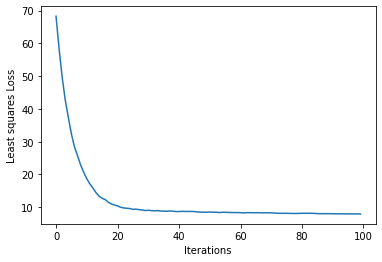

In [ ]:
plt.plot(test_score)
plt.xlabel('Iterations')
plt.ylabel('Least squares Loss')

In [ ]:
gbt.score(testX,testY)

0.900190332400556

### 4. VotingClassifier
* El concepto central de VotingClassifier es combinar clasificadores conceptualmente diferentes de aprendizaje automático y utilizar un voto mayoritario o un voto ponderado para predecir las etiquetas de clase.
* El clasificador de votación es bastante efectivo con buenos estimadores y maneja las limitaciones individuales, los métodos de conjunto también pueden participar.
* Tipos de clasificador de votación
  - Clasificador de votación suave, diferentes pesos configurados para diferentes estimadores
  - Clasificador de votación rígido, todos los estimadores tienen el mismo peso

##### Problema: identificación DIGIT usando VotingClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [ ]:
estimators = [ 
    ('rf',RandomForestClassifier(n_estimators=20)),
    ('svc',SVC(kernel='rbf', probability=True)),
    ('knc',KNeighborsClassifier()),
    ('abc',AdaBoostClassifier(base_estimator=DecisionTreeClassifier() ,n_estimators=20)),
    ('lr',LogisticRegression()) 
]

In [ ]:
vc = VotingClassifier(estimators=estimators, voting='hard')

In [ ]:
digits = load_digits()

In [ ]:
X,y = digits.data, digits.target

In [ ]:
trainX, testX, trainY, testY = train_test_split(X,y)

In [ ]:
vc.fit(trainX,trainY)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

In [ ]:
vc.score(testX,testY)

0.9844444444444445

In [ ]:
for est,name in zip(vc.estimators_,vc.estimators):
    print (name[0], est.score(testX,testY))
    

rf 0.9577777777777777
svc 0.9822222222222222
knc 0.9866666666666667
abc 0.8533333333333334
lr 0.9622222222222222


In [ ]:
vc = VotingClassifier(estimators=estimators, voting='soft', weights=[2,.1,3,2,2])

In [ ]:
vc.fit(trainX,trainY)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

In [ ]:
vc.score(testX,testY)

0.9866666666666667